# **Table of Contents**
1) Imports
2) Loading the Dataset and Creating of DataFrame
3) Labelling the classes and plot the Classification Graph

**Importing various Libraries**

**Loading the Dataset , creating a Data Frame which includes labels and saving it to a CSV file** 

In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from glob import glob
import shutil

# Set seed for reproducibility
random.seed(42)

# Original dataset path
dataset_path = "/kaggle/input/dataset/DATASET"

# Output path for few-shot dataset
fewshot_path = "/kaggle/working/fewshot_dataset"

# Classes to process
classes = ["Biodegradable", "Nonbiodegradable", "Recyclable"]
max_images_per_class = 4000

# Create output folders
for label in classes:
    os.makedirs(os.path.join(fewshot_path, label), exist_ok=True)

# Initialize new lists for DataFrame
fewshot_image_paths = []
fewshot_labels = []

# Process each class
for label in classes:
    class_path = os.path.join(dataset_path, label)
    
    # Collect all image paths from all subfolders
    all_image_paths = []
    for subfolder in os.listdir(class_path):
        subfolder_path = os.path.join(class_path, subfolder)
        if os.path.isdir(subfolder_path):
            images = [os.path.join(subfolder_path, img)
                      for img in os.listdir(subfolder_path)
                      if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
            all_image_paths.extend(images)
    
    # Shuffle and take only 4000
    selected_images = random.sample(all_image_paths, max_images_per_class)
    
    # Copy selected images to new folder and update DataFrame info
    for idx, src_path in enumerate(selected_images):
        ext = os.path.splitext(src_path)[1]
        dst_filename = f"{label}_{idx}{ext}"
        dst_path = os.path.join(fewshot_path, label, dst_filename)
        shutil.copy(src_path, dst_path)
        
        # Store relative path and label
        fewshot_image_paths.append(os.path.join(label, dst_filename))
        fewshot_labels.append(label)

# Create DataFrame for few-shot dataset
fewshot_df = pd.DataFrame({
    "image_path": fewshot_image_paths,
    "label": fewshot_labels
})

# Save CSV
csv_path = "/kaggle/working/fewshot_dataset_labels.csv"
fewshot_df.to_csv(csv_path, index=False)

print(f"Few-shot dataset CSV saved to: {csv_path}")
print(f"Total images per class (after sampling):\n{fewshot_df['label'].value_counts()}")


**Display the Classified Dataframe**

In [ ]:
df = pd.read_csv("/kaggle/working/fewshot_dataset_labels.csv")
print(df.head())


                          image_path          label
0  Biodegradable/Biodegradable_0.jpg  Biodegradable
1  Biodegradable/Biodegradable_1.png  Biodegradable
2  Biodegradable/Biodegradable_2.JPG  Biodegradable
3  Biodegradable/Biodegradable_3.jpg  Biodegradable
4  Biodegradable/Biodegradable_4.jpg  Biodegradable


In [ ]:
dff=pd.DataFrame(df)
dff.tail()

,image_path,label
11995,Recyclable/Recyclable_3995.png,Recyclable
11996,Recyclable/Recyclable_3996.png,Recyclable
11997,Recyclable/Recyclable_3997.jpg,Recyclable
11998,Recyclable/Recyclable_3998.png,Recyclable
11999,Recyclable/Recyclable_3999.png,Recyclable



**Plotting a Bar Graph which displays how many images belong to a Specific class.The classes are Biodegradable,Non Biodegradable and Recyclable**


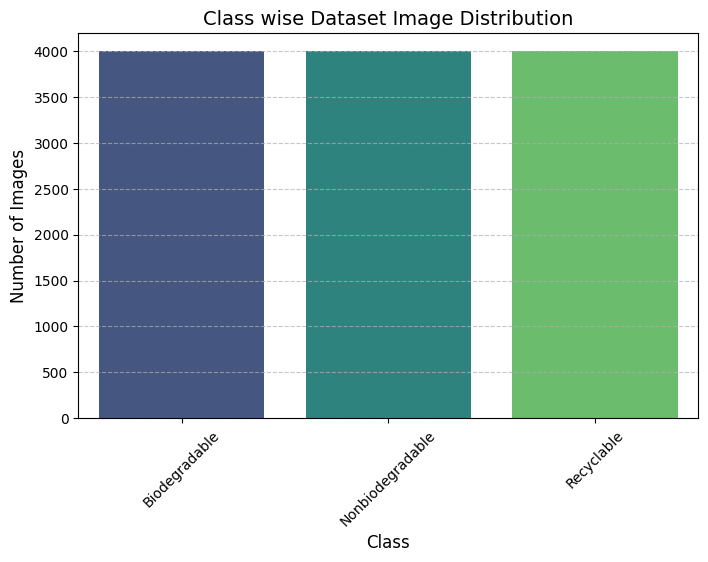

In [ ]:
# Load dataset labels CSV
csv_path = "/kaggle/working/fewshot_dataset_labels.csv"  
df = pd.read_csv(csv_path)

# Count images per class
class_counts = df["label"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class wise Dataset Image Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Print the dimensions of the fewshot dataset

In [ ]:
df.shape

(12000, 2)

Make a copy of input datasets in kaggle/working folder

In [ ]:
import shutil
import os
os.makedirs("/kaggle/working/best-model-keras/best_model.keras", exist_ok=True)
shutil.copy("/kaggle/input/best-model-keras/best_model.keras", "/kaggle/working/best-model-keras/best_model.keras")


'/kaggle/working/best-model-keras/best_model.keras/best_model.keras'

In [ ]:
os.makedirs("/kaggle/working/datasetlabel2/dataset_label2.csv", exist_ok=True)
shutil.copy("/kaggle/input/datasetlabel2/dataset_label2.csv", "/kaggle/working/datasetlabel2/dataset_label2.csv")


'/kaggle/working/datasetlabel2/dataset_label2.csv/dataset_label2.csv'

In [ ]:
import os
import shutil
os.makedirs("/kaggle/working/dataset-labels-augmented/dataset_labels_augmented2.csv", exist_ok=True)
shutil.copy("/kaggle/input/dataset-labels-augmented/dataset_labels_augmented2 (1).csv","/kaggle/working/dataset-labels-augmented/dataset_labels_augmented2.csv")


'/kaggle/working/dataset-labels-augmented/dataset_labels_augmented2.csv/dataset_labels_augmented2 (1).csv'

In [ ]:
import os
import shutil
os.makedirs("/kaggle/working/fewshot-dataset-labels/fewshot_dataset_labels.csv", exist_ok=True)
shutil.copy("/kaggle/input/fewshot-dataset-labels/fewshot_dataset_labels (1).csv","/kaggle/working/fewshot-dataset-labels/fewshot_dataset_labels.csv")


'/kaggle/working/fewshot-dataset-labels/fewshot_dataset_labels.csv/fewshot_dataset_labels (1).csv'

In [ ]:
import pandas as pd
# df = pd.read_csv("/kaggle/working/dataset_labels.csv")
df = pd.read_csv("/kaggle/working/datasetlabel2/dataset_label2.csv/dataset_label2.csv")


print(df["label"].value_counts()) 

Series([], Name: count, dtype: int64)


**Augmenting the Dataset**

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Load dataset
# csv_path = "/kaggle/working/fewshot_dataset_labels.csv"
csv_path = '/kaggle/working/fewshot-dataset-labels/fewshot_dataset_labels.csv/fewshot_dataset_labels (1).csv'


df = pd.read_csv(csv_path)

# Filter only Recyclable images
recyclable_df = df[df["label"] == "Recyclable"]

# Define paths
dataset_dir = "/kaggle/working/fewshot_dataset" 
augmented_dir = "/kaggle/working/augmented_recyclable"  # Folder to save augmented images

# Ensure the base augmentation directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Image augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


new_image_paths = []

# Loop through each recyclable image and generate augmented versions
for _, row in tqdm(recyclable_df.iterrows(), total=len(recyclable_df)):
    img_path = os.path.join(dataset_dir, row["image_path"])

    # Check if image file exists
    if not os.path.exists(img_path):
        print(f"Skipping missing file: {img_path}")
        continue  # Skip to the next image

    try:
        img = load_img(img_path)  # Load image
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        continue  # Skip corrupted images

    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Extract subfolder path
    subfolder = os.path.dirname(row["image_path"])
    save_subdir = os.path.join(augmented_dir, subfolder)  # Path to save augmented images

    # Ensure subdirectory exists
    os.makedirs(save_subdir, exist_ok=True)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(img_array, batch_size=1):
        aug_img_name = f"aug_{i}_{os.path.basename(row['image_path'])}"
        aug_img_path = os.path.join(save_subdir, aug_img_name) 
        
        array_to_img(batch[0]).save(aug_img_path)  # Save augmented image
        new_image_paths.append([aug_img_path, "Recyclable"])  # Store new image path
        
        i += 1
        if i >= AUGMENTATIONS_PER_IMAGE:
            break  # Stop after required augmentations

# Convert new images to DataFrame
new_df = pd.DataFrame(new_image_paths, columns=["image_path", "label"])

# Append to original dataset
df = pd.concat([df, new_df], ignore_index=True)

# Save updated dataset CSV
augmented_csv_path = "/kaggle/working/dataset_labels_augmented2.csv"
df.to_csv(augmented_csv_path, index=False)

print(f"✅ Dataset augmentation complete! New CSV saved at {augmented_csv_path}")



100%|██████████| 4000/4000 [04:28<00:00, 14.87it/s]

✅ Dataset augmentation complete! New CSV saved at /kaggle/working/dataset_labels_augmented2.csv


**Creating New CSV**


In [ ]:
# Define dataset path
# dataset_path = "/kaggle/input/augmenteddataset/DATASET"  
# dataset_path = "/kaggle/working/dataset_labels_augmented2.csv"  
dataset_path =  "/kaggle/working/fewshot_dataset"
# Initialize lists
image_paths = []
labels = []

# Iterate through main categories (Biodegradable, Nonbiodegradable)
for category in ["Biodegradable", "Nonbiodegradable","Recyclable"]:
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):  # Ensure it's a directory
        for subcategory in os.listdir(category_path):  # Iterate through subcategories
            subcategory_path = os.path.join(category_path, subcategory)

            if os.path.isdir(subcategory_path):  # Ensure it's a directory
                for image_name in os.listdir(subcategory_path):
                    if image_name.endswith((".png", ".jpg", ".jpeg")):  # Filter image files
                        image_paths.append(os.path.join(category, subcategory, image_name))  # Store relative path
                        labels.append(category)  # Assign main category as label

# Create DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": labels})

# Save to CSV
csv_path = "/kaggle/working/dataset_label2.csv"
df.to_csv(csv_path, index=False)

print(f"Dataset labels saved to {csv_path}")


Dataset labels saved to /kaggle/working/dataset_label2.csv


In [ ]:
import shutil
import os

# Define path to the augmented dataset
augmented_dir = "/kaggle/working/augmented_recyclable"
zip_path = "/kaggle/working/augmented_recyclable.zip"

# Ensure the directory exists before zipping
if os.path.exists(augmented_dir):
    # Zip the folder
    shutil.make_archive(augmented_dir, 'zip', augmented_dir)
    print(f"✅ Augmented dataset zipped at {zip_path}")
else:
    print("⚠️ Augmented dataset not found. Please check if the augmentation script ran successfully.")


✅ Augmented dataset zipped at /kaggle/working/augmented_recyclable.zip


**Display the Augmented Data**

**Appending Image Paths in CSV to start with /kaggle/input**

In [ ]:
import pandas as pd
import os

# Load CSV
csv_path = "/kaggle/input/augmented/dataset_label2.csv"  
df = pd.read_csv(csv_path)

# Fix image paths by adding the full directory
dataset_dir = "/kaggle/input/augmenteddataset/DATASET" 
df["image_path"] = df["image_path"].apply(lambda x: os.path.join(dataset_dir, x))
# df["image_path"] = "/kaggle/input/your_dataset_folder/" + df["image_path"] 

# Checking if files exist now
missing_files = df[~df["image_path"].apply(os.path.exists)]
print(f"Missing {len(missing_files)} files after path correction")

# Saved the corrected CSV for later use
df.to_csv("/kaggle/working/fixed_dataset.csv", index=False)

print("Image paths fixed!")


Missing 0 files after path correction
Image paths fixed!


**Resizing to 224,224 , Shuffling to 80% Training , 20% Validation**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile, Image
import numpy as np
import os

#for truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

#Fix for transparency issue in some images
def preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        if img.mode == "P":  # Convert palette images with transparency
            img = img.convert("RGBA").convert("RGB")
        return img
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

# DATASET_PATH = "/kaggle/input/d/ssarkar04/dataset/DATASET"  
# DATASET_PATH =  "/kaggle/working/fewshot-dataset-labels"
# DATASET_PATH = '/kaggle/working/fewshot-dataset-labels/fewshot_dataset_labels.csv/fewshot_dataset_labels (1).csv'
# dataset_dir = "/kaggle/working/fewshot_dataset" 
DATASET_PATH =  "/kaggle/input/augmenteddataset/DATASET"

#Data Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% Train, 20% Validation
)

#Load training and validation sets
train_ds = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="training"
)

val_ds = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation"
)

**Loading RestNet50 CNN model and Starting the Training**

In [ ]:
#Load pre-trained ResNet50 (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pre-trained layers

#Build the new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")  # 3 classes: Biodegradable, Nonbiodegradable, Recyclable
])

#Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#Define callbacks (early stopping & model checkpoint)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

#Train the model
print("Training started...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    # callbacks=[early_stopping, checkpoint]
    callbacks=[checkpoint]
)

#Evaluate model
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training started...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 606/1051 ━━━━━━━━━━━━━━━━━━━━ 3:48 514ms/step - accuracy: 0.4044 - loss: 1.0944

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1051/1051 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.4209 - loss: 1.0761
Epoch 1: val_accuracy improved from -inf to 0.42036, saving model to /kaggle/working/best_model.keras
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 695s 646ms/step - accuracy: 0.4209 - loss: 1.0760 - val_accuracy: 0.4204 - val_loss: 1.0921
Epoch 2/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5226 - loss: 0.9805
Epoch 2: val_accuracy improved from 0.42036 to 0.43869, saving model to /kaggle/working/best_model.keras
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 557s 527ms/step - accuracy: 0.5226 - loss: 0.9805 - val_accuracy: 0.4387 - val_loss: 1.0345
Epoch 3/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.5616 - loss: 0.9182
Epoch 3: val_accuracy did not improve from 0.43869
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 552s 523ms/step - accuracy: 0.5616 - loss: 0.9182 - val_accuracy: 0.3970 - val_loss: 1.1099
Epoch 4/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.5734 - loss: 0.9087
Epoch 4: val_accuracy im

NameError: name 'plt' is not defined

EPochs when correct classification was done by model

![photo_6070974489971245770_y (1).jpg](<attachment:photo_6070974489971245770_y (1).jpg>)
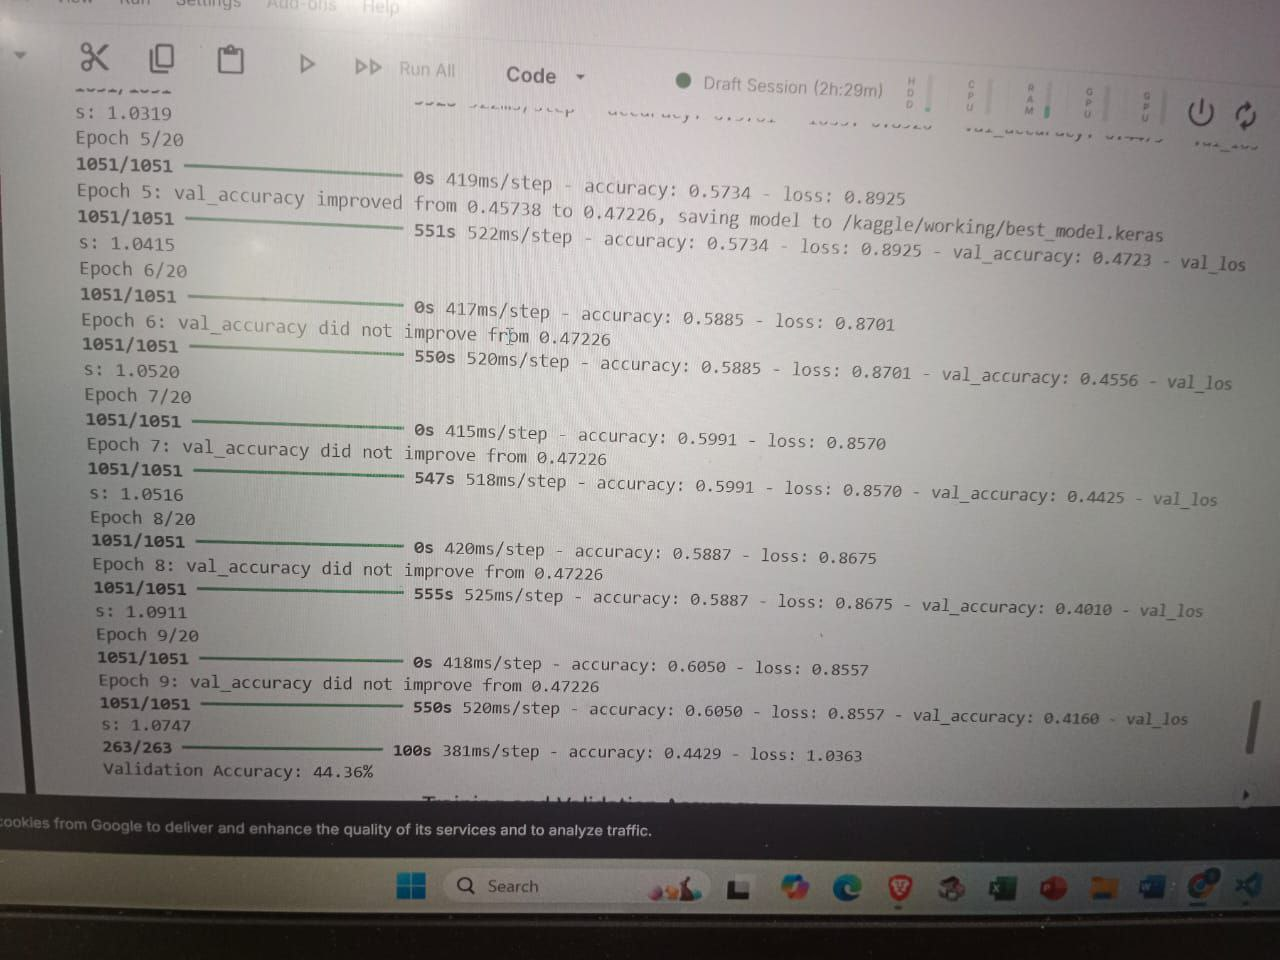

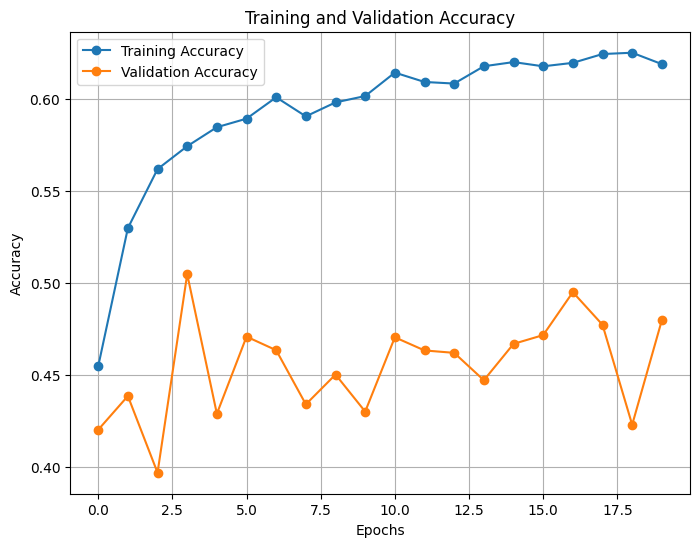

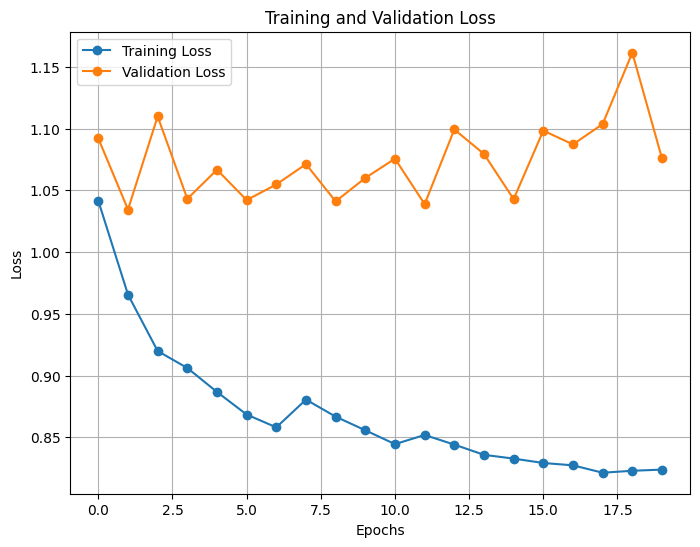

Model saved successfully at /kaggle/working/model_final.keras!


In [5]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
 
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

#Save final trained l
MODEL_PATH = "/kaggle/working/model_final.keras"
model.save(MODEL_PATH)
print(f"Model saved successfully at {MODEL_PATH}!")

Plotting the confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Images processed: 64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Images processed: 96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Images processed: 256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Images processed: 288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Images processed: 320
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Images processed: 352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Images processed: 384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Images processed: 480
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Images processed: 512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image

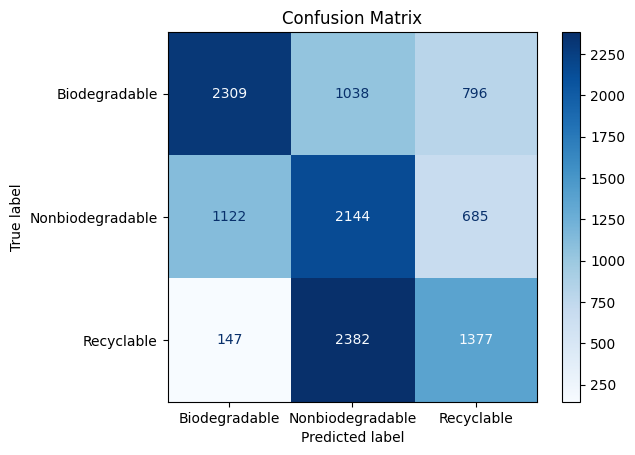

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to hold true and predicted labels
y_true = []
y_pred = []

# Counter to track number of images processed
images_processed = 0
limit = 12000  # Maximum number of images to process

# Generate predictions
for images, labels in val_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)

    # Limit handling
    batch_size = len(labels)
    if images_processed + batch_size > limit:
        # Trim batch to match the limit
        remaining = limit - images_processed
        y_true.extend(labels[:remaining])
        y_pred.extend(preds[:remaining])
        images_processed += remaining
        print(f"Images processed: {images_processed}")
        break
    else:
        y_true.extend(labels)
        y_pred.extend(preds)
        images_processed += batch_size
        print(f"Images processed: {images_processed}")

# Optional: convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Biodegradable", "Nonbiodegradable", "Recyclable"]))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Biodegradable", "Nonbiodegradable", "Recyclable"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


**Testing on a Random Image -> Trying to Predict its Class**

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("/kaggle/working/model_final.keras")

# Function to preprocess and predict an image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get class index

    class_labels = ["Biodegradable", "Nonbiodegradable", "Recyclable"] 
    return class_labels[predicted_class]

# Example usage
img_path = "/kaggle/input/cansss/images.jpeg"  
prediction = predict_image(img_path)
print(f"Predicted Category: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Category: Biodegradable


Correct classification in initial epochs

![photo_6070974489971245769_y (2).jpg](<attachment:photo_6070974489971245769_y (2).jpg>)
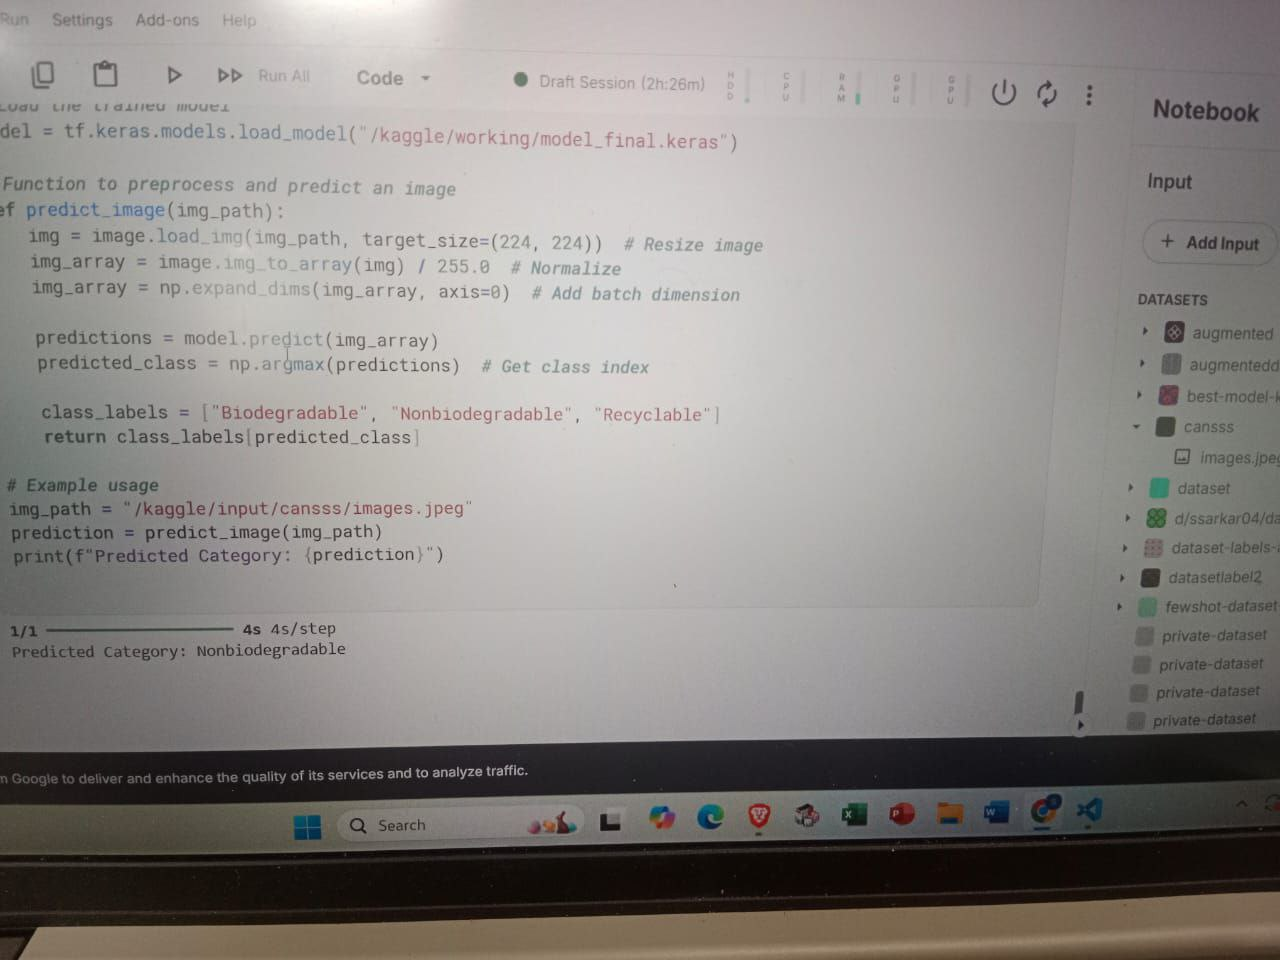